In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
dataset = pd.read_csv("train.csv")

In [4]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

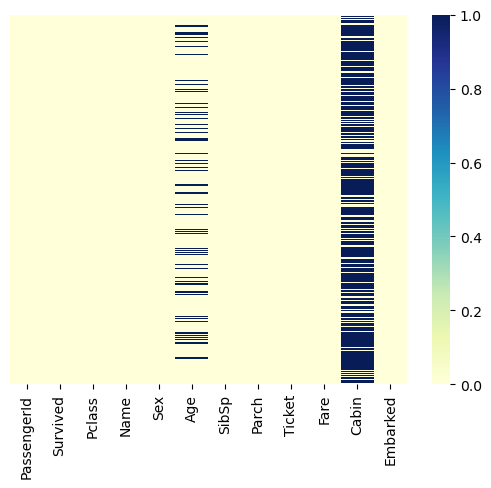

In [6]:
sns.heatmap ( dataset.isnull() ,  yticklabels=False, cmap="YlGnBu")

In [7]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
dataset.drop("PassengerId" , axis=1 , inplace=True)
dataset.drop("Name" , axis=1 , inplace=True)
dataset.drop("Ticket" , axis=1 , inplace=True)
dataset.drop("Fare" , axis=1 , inplace=True)
dataset.drop("Parch" , axis=1 , inplace=True)
dataset.drop("Cabin" , axis=1 , inplace=True)

In [10]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,NaN,1,S
889,1,1,male,26.0,0,C


In [11]:
for i in range(1 , 4):
    age = int( dataset [ dataset["Pclass"] == i ]['Age'].dropna().mean()   )
    print(age)

38
29
25


In [12]:
import numpy

def set_age(row):
    
    Pclass = row[0]
    age = row[1]
   
    if numpy.isnan(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
        
    else:
        return age
    

In [13]:
dataset["Age"] = dataset[  ["Pclass" ,"Age"] ].apply(set_age , axis=1)

<AxesSubplot:>

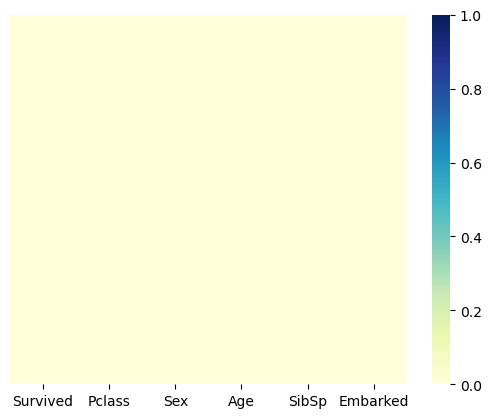

In [14]:
sns.heatmap ( dataset.isnull() ,  yticklabels=False, cmap="YlGnBu")

In [15]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S
...,...,...,...,...,...,...
886,0,2,male,27.0,0,S
887,1,1,female,19.0,0,S
888,0,3,female,25.0,1,S
889,1,1,male,26.0,0,C


In [16]:
Pclass = pd.get_dummies( dataset["Pclass"], drop_first=True)

Sex = pd.get_dummies( dataset["Sex"], drop_first=True)

SibSp = pd.get_dummies( dataset["SibSp"], drop_first=True)

Embarked = pd.get_dummies( dataset["Embarked"], drop_first=True)

dataset.drop( ["Pclass", "Sex", "SibSp", "Embarked"] , axis=1, inplace=True)

In [17]:
dataset

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,25.0
889,1,26.0


In [18]:
dataset = pd.concat( [dataset , Pclass,Sex , SibSp , Embarked] , axis=1)

In [19]:
X = dataset.drop("Survived", axis=1)
y = dataset["Survived"]

In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [35]:
X.columns = X.columns.astype(str)

In [36]:
dataset

,Survived,Age,2,3,male,1,2,3,4,5,8,Q,S
0,0,22.0,0,1,1,1,0,0,0,0,0,0,1
1,1,38.0,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,0,0,0,1,0,0,0,0,0,0,1
4,0,35.0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,1,0,1,0,0,0,0,0,0,0,1
887,1,19.0,0,0,0,0,0,0,0,0,0,0,1
888,0,25.0,0,1,0,1,0,0,0,0,0,0,1
889,1,26.0,0,0,1,0,0,0,0,0,0,0,0


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train, y_train)

C:\anaconda 1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [41]:
model.coef_


array([[-0.02775559, -0.62200337, -1.88311531, -2.47348605,  0.14914757,
         0.06287817, -1.04701842, -0.66384496, -0.7379274 , -1.06813073,
        -0.16242574, -0.53647042]])

In [42]:
model.intercept_

array([3.36209244])

In [43]:
y_pred = model.predict(X_test)

C:\anaconda 1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [44]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [45]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [19, 55]], dtype=int64)

In [48]:
(90 + 55)  / ( 90 + 15 + 19 +55 )

0.8100558659217877

In [49]:
dataset_test = pd.read_csv("test.csv")

In [50]:
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [51]:
dataset_test.drop("PassengerId" , axis=1 , inplace=True)
dataset_test.drop("Name" , axis=1 , inplace=True)
dataset_test.drop("Ticket" , axis=1 , inplace=True)
dataset_test.drop("Fare" , axis=1 , inplace=True)
dataset_test.drop("Parch" , axis=1 , inplace=True)
dataset_test.drop("Cabin" , axis=1 , inplace=True)

In [52]:
dataset_test

,Pclass,Sex,Age,SibSp,Embarked
0,3,male,34.5,0,Q
1,3,female,47.0,1,S
2,2,male,62.0,0,Q
3,3,male,27.0,0,S
4,3,female,22.0,1,S
...,...,...,...,...,...
413,3,male,NaN,0,S
414,1,female,39.0,0,C
415,3,male,38.5,0,S
416,3,male,NaN,0,S
